In [ ]:
import os
import shutil

os.getcwd()

In [1]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout

model = Sequential([
    Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(100,100,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(units=128, activation='relu'),
    Dense(units=15, activation='softmax')
])

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_path = 'output1/train'
valid_path = 'output1/val'
test_path = 'output1/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

train_batches = train_datagen.flow_from_directory(
    directory=train_path, 
    target_size=(100,100), 
    batch_size=32
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

validation_batches = test_datagen.flow_from_directory(
        directory=valid_path, 
        target_size=(100,100),  
        batch_size=32
)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
        directory=test_path, target_size=(100,100), batch_size=32)

Found 6152 images belonging to 15 classes.
Found 721 images belonging to 15 classes.
Found 372 images belonging to 15 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

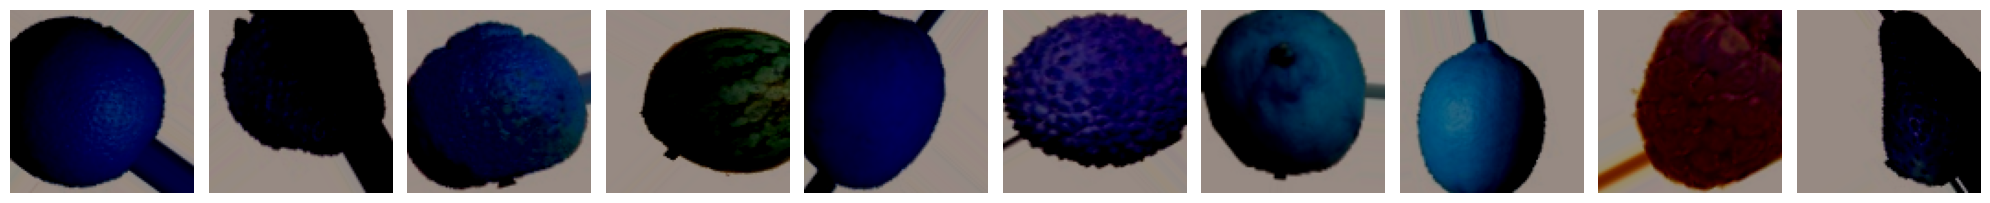

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [4]:
imgs, labels = next(train_batches)

import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
print(labels)

In [5]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [6]:
model.fit(x=train_batches, validation_data=validation_batches, epochs=5, verbose=2)

Epoch 1/5
193/193 - 31s - loss: 1.3743 - accuracy: 0.5393 - val_loss: 0.3490 - val_accuracy: 0.9182 - 31s/epoch - 161ms/step
Epoch 2/5
193/193 - 24s - loss: 0.3993 - accuracy: 0.8644 - val_loss: 0.1078 - val_accuracy: 0.9736 - 24s/epoch - 126ms/step
Epoch 3/5
193/193 - 24s - loss: 0.2165 - accuracy: 0.9314 - val_loss: 0.0566 - val_accuracy: 0.9889 - 24s/epoch - 123ms/step
Epoch 4/5
193/193 - 24s - loss: 0.1453 - accuracy: 0.9486 - val_loss: 0.0286 - val_accuracy: 0.9931 - 24s/epoch - 123ms/step
Epoch 5/5
193/193 - 27s - loss: 0.1009 - accuracy: 0.9672 - val_loss: 0.0279 - val_accuracy: 0.9931 - 27s/epoch - 141ms/step


In [22]:
model.save('model_lux/')


INFO:tensorflow:Assets written to: model_lux/assets


INFO:tensorflow:Assets written to: model_lux/assets


In [10]:
from matplotlib import image
import numpy as np
from PIL import Image
from keras.applications.vgg16 import preprocess_input


img = Image.open('data/test/rose/6950609394_c53b8c6ac0_m.jpg')

np_image = img.resize((100, 100))

fig, plot = plt.subplots(2)
plot[0].imshow(np_image)
np_image = np.expand_dims(np_image, axis=0)
np_image = preprocess_input(np_image)

model.predict(np_image)







FileNotFoundError: [Errno 2] No such file or directory: 'data/test/rose/6950609394_c53b8c6ac0_m.jpg'

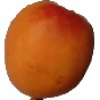

1/1 [==============================] - 0s 20ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


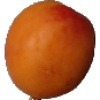

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


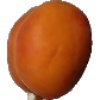

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


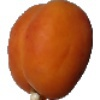

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


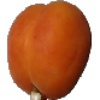

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


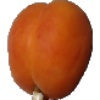

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


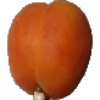

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


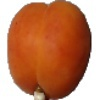

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


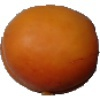

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


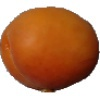

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


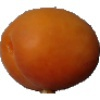

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


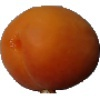

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


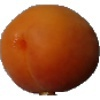

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


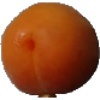

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


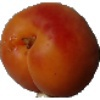

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


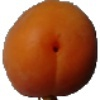

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


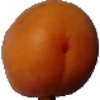

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


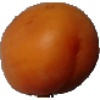

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


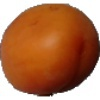

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


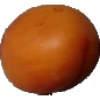

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


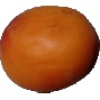

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


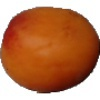

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


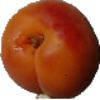

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


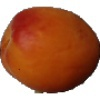

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


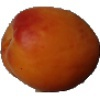

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


In [21]:
from tensorflow.keras.preprocessing import image
import tensorflow.keras as keras
import numpy as np
import os

path = "./output1/test/apricot/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

In [13]:
train_batches.class_indices

{'Apple': 0,
 'Apricot': 1,
 'Avocado': 2,
 'Banana': 3,
 'Blueberry': 4,
 'Cherry': 5,
 'Grape': 6,
 'Lemon': 7,
 'Lychee': 8,
 'Mandarine': 9,
 'Orange': 10,
 'Pear': 11,
 'Raspberry': 12,
 'Strawberry': 13,
 'Watermelon': 14}